In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_validate
import statsmodels.formula.api as SM
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
import os
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_excel('Company_Data2015-1.xlsx')

In [15]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [16]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-',("_")).str.replace('%','perc')

In [17]:
df.dtypes.value_counts()

float64    63
int64       3
object      1
dtype: int64

In [18]:
print('The number of rows is =',df.shape[0],'\n''The number of columns is =', df.shape[1])

The number of rows is = 3586 
The number of columns is = 67


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets/Liabilities_     

In [20]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
...,...,...,...,...,...,...,...,...
Debtors_Velocity_Days,3586.00,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Velocity_Days,3586.00,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Velocity_Days,3483.00,79.64,137.85,-199.00,0.00,35.00,96.00,996.00
Value_of_Output/Total_Assets,3586.00,0.82,1.20,-0.33,0.07,0.48,1.16,17.63


In [21]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [22]:
df1 = df.drop(['Co_Code', 'Co_Name'], axis = 1)

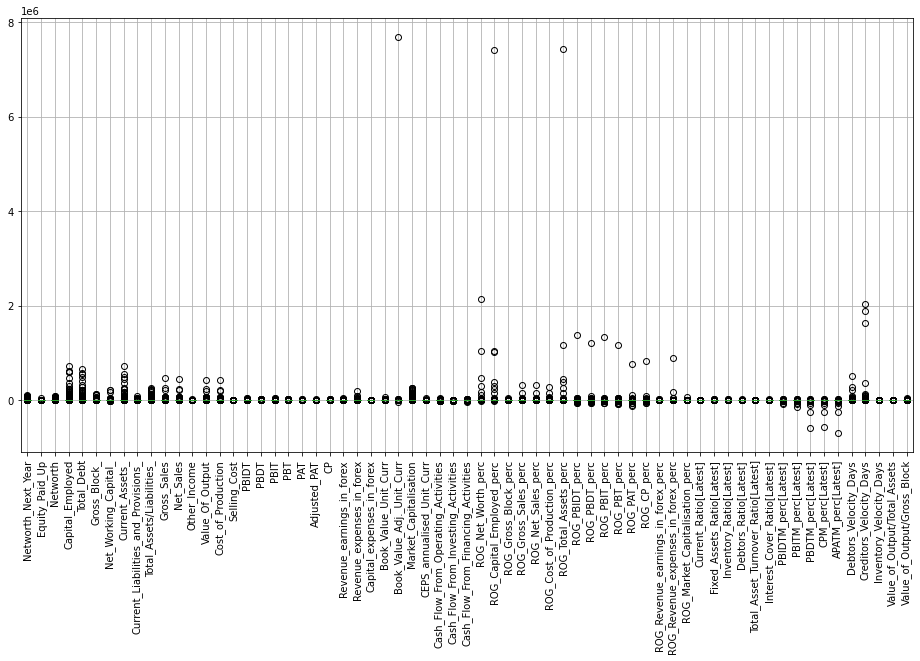

In [23]:
df1.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

In [24]:
def mod_outlier(df1):
    df1 = df1._get_numeric_data()
    
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr )
    upper_bound    = q3 + (1.5 * iqr)
 
    for col in df1.columns:
        for i in range(0,len(df1[col])):
            if df1[col][i] < lower_bound[col]:
                df1[col][i] = lower_bound[col]
            
            if df1[col][i] > upper_bound[col]: 
                    df1[col][i] = upper_bound[col]
    for col in df1.columns:
        return(df1)

In [25]:
df_new = mod_outlier(df1)

In [26]:
df_new.isnull().sum().sort_values(ascending=False).head(10)

Inventory_Velocity_Days               103
Book_Value_Adj._Unit_Curr               4
Current_Ratio[Latest]                   1
PBITM_perc[Latest]                      1
Fixed_Assets_Ratio[Latest]              1
Inventory_Ratio[Latest]                 1
Debtors_Ratio[Latest]                   1
Total_Asset_Turnover_Ratio[Latest]      1
PBIDTM_perc[Latest]                     1
Interest_Cover_Ratio[Latest]            1
dtype: int64

In [27]:
df_new.isnull().sum().sum()

118

In [28]:
print(np.where(df_new.isnull().sum()>0))

(array([27, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62], dtype=int64),)


In [29]:
df_new.fillna(df.median())


,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,Total_Assets/Liabilities_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output/Total_Assets,Value_of_Output/Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-21.43,-21.16,-17.09,-11.12,29,101,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,-17.09,-11.12,97,210,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-21.16,-17.09,-11.12,93,63,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-28.48,-21.43,-21.16,28.48,18.52,253,210,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,303.53,43.17,287.41,555.11,180.83,328.88,0.00,332.19,163.03,760.52,...,0.00,0.00,0.00,0.00,0.00,0,0,35.00,0.60,7.76
3582,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,39.92,32.17,29.81,28.48,18.52,13,53,77.00,0.29,1.00
3583,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,8.09,6.69,7.31,5.69,4.29,7,30,48.00,1.42,3.24
3584,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,28.12,20.55,23.39,19.55,11.99,32,69,42.00,0.36,0.68


In [30]:
cat=[]
num=[]
for i in df_new.columns:
    if df_new[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

print(cat)
print(num)

[]
['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_', 'Net_Working_Capital_', 'Current_Assets_', 'Current_Liabilities_and_Provisions_', 'Total_Assets/Liabilities_', 'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex', 'Capital_expenses_in_forex', 'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities', 'Cash_Flow_From_Investing_Activities', 'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc', 'ROG_Revenue_earnings_in_forex_per

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [32]:
df_new = pd.DataFrame(imputer.fit_transform(df_new))
df_new.columns=num

In [33]:
df_new.isnull().any().any()

False

In [34]:
df_new.isnull().sum().sort_values(ascending=False).head(20)

Networth_Next_Year                    0
ROG_Net_Worth_perc                    0
ROG_Gross_Block_perc                  0
ROG_Gross_Sales_perc                  0
ROG_Net_Sales_perc                    0
ROG_Cost_of_Production_perc           0
ROG_Total_Assets_perc                 0
ROG_PBIDT_perc                        0
ROG_PBDT_perc                         0
ROG_PBIT_perc                         0
ROG_PBT_perc                          0
ROG_PAT_perc                          0
ROG_CP_perc                           0
ROG_Revenue_earnings_in_forex_perc    0
ROG_Revenue_expenses_in_forex_perc    0
ROG_Market_Capitalisation_perc        0
Current_Ratio[Latest]                 0
Fixed_Assets_Ratio[Latest]            0
Inventory_Ratio[Latest]               0
Debtors_Ratio[Latest]                 0
dtype: int64

In [35]:
df_new['default'] = np.where((df_new['Networth_Next_Year'] > 0), 0, 1)

In [36]:
df_new['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [37]:
df_new['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [38]:
X = df_new.drop(['default','Networth_Next_Year'], axis=1)
y = df_new['default']

Build a Random Forest Model on Train Dataset. Also showcase your model building approach.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [40]:
param_grid_rfcl = {
 'max_depth': [4,5,6],
 'max_features': [2,3,4,5],
 'min_samples_leaf': [8,9,11,15],
 'min_samples_split': [46,50,55],
 'n_estimators': [290,350,400]
}
rfcl = RandomForestClassifier(random_state=42)
grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv =3)


In [41]:
grid_search_rfcl.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [8, 9, 11, 15],
                         'min_samples_split': [46, 50, 55],
                         'n_estimators': [290, 350, 400]})

In [42]:
grid_search_rfcl.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 290}

In [43]:
best_grid_rfcl = grid_search_rfcl.best_estimator_

In [44]:
best_grid_rfcl

RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=8,
                       min_samples_split=50, n_estimators=290, random_state=42)

In [45]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [46]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.17,0.83
1,1.00,0.00
2,0.99,0.01
3,0.94,0.06
4,1.00,0.00


In [47]:
print (pd.DataFrame (best_grid_rfcl.feature_importances_,
     columns = ["Important"],
     index = X_test.columns).sort_values('Important',ascending=False))

                                    Important
Networth                                 0.19
Book_Value_Adj._Unit_Curr                0.19
Book_Value_Unit_Curr                     0.18
Capital_Employed                         0.05
Current_Ratio[Latest]                    0.05
...                                       ...
Revenue_expenses_in_forex                0.00
Revenue_earnings_in_forex                0.00
Capital_expenses_in_forex                0.00
ROG_Revenue_expenses_in_forex_perc       0.00
ROG_Revenue_earnings_in_forex_perc       0.00

[64 rows x 1 columns]


In [48]:
rfcl = RandomForestClassifier(max_depth=6, max_features=5, min_samples_leaf=8, min_samples_split=50, n_estimators=290, random_state=42)

In [49]:
selector_RF = RFE(estimator = rfcl, n_features_to_select=21, step=1)

In [50]:
selector_RF = selector_RF.fit(X_train, y_train)


In [51]:
selector_RF.n_features_

21

In [52]:
selector_RF.ranking_

array([30,  1,  1,  1, 10,  1, 16, 17,  1, 23, 11, 37, 18, 33, 38,  1,  1,
        1,  1,  1,  1,  1, 39, 36, 42,  1,  1, 12,  1, 31, 27, 26,  1,  2,
       29, 28, 32,  4,  7,  9, 13, 21, 15, 19, 20, 43, 44, 25,  1,  8, 35,
       40,  5,  1,  1,  1,  3,  6, 14, 41, 24, 34, 22,  1])

In [53]:
df = pd.DataFrame({'Feature':X.columns,'Rank': selector_RF.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
3,Total_Debt,1
5,Net_Working_Capital_,1
8,Total_Assets/Liabilities_,1
15,PBIDT,1
16,PBDT,1
17,PBIT,1
18,PBT,1
19,PAT,1


In [54]:
pred_train_RF = selector_RF.predict(X_train)
pred_test_RF = selector_RF.predict(X_test)

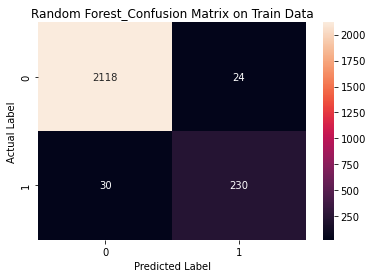

In [55]:
ax=sns.heatmap(metrics.confusion_matrix(y_train, pred_train_RF),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest_Confusion Matrix on Train Data')
plt.show()


In [56]:
print(classification_report(y_train, pred_train_RF))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2142
           1       0.91      0.88      0.89       260

    accuracy                           0.98      2402
   macro avg       0.95      0.94      0.94      2402
weighted avg       0.98      0.98      0.98      2402



Area under Curve is 0.9961322990734754


,0,1
0,0.17,0.83
1,1.00,0.00
2,0.99,0.01
3,0.94,0.06
4,1.00,0.00


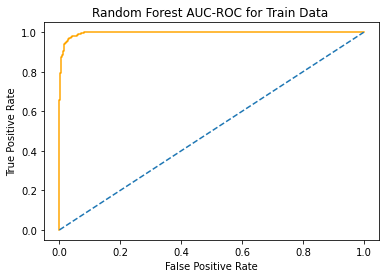

In [57]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_train,selector_RF.predict_proba(X_train)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest AUC-ROC for Train Data ")
rf_test_auc=roc_auc_score(y_train,selector_RF.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_test_auc)

ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

In [58]:
pred_test_RF
pred_test_prob_rfcl=selector_RF.predict_proba(X_test)
pred_test_prob_rfcl
pd.DataFrame(pred_test_prob_rfcl).head()

,0,1
0,0.07,0.93
1,1.00,0.00
2,1.00,0.00
3,0.99,0.01
4,1.00,0.00


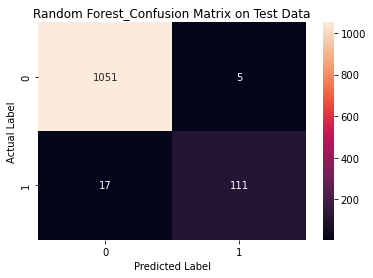

In [59]:
ax=sns.heatmap(metrics.confusion_matrix(y_test, pred_test_RF),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest_Confusion Matrix on Test Data')
plt.show()

In [60]:
print(classification_report(y_test, pred_test_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1056
           1       0.96      0.87      0.91       128

    accuracy                           0.98      1184
   macro avg       0.97      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



Area under Curve is 0.9903601444128788


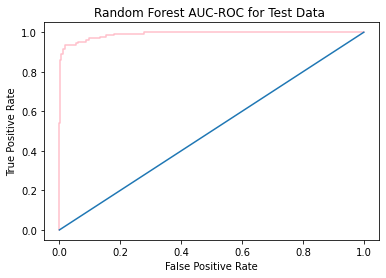

In [61]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,selector_RF.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='pink')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest AUC-ROC for Test Data ")
rf_test_auc=roc_auc_score(y_test,selector_RF.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [64]:
LDA_model=LinearDiscriminantAnalysis()
selector_LDA = RFE(estimator = LDA_model, n_features_to_select=21, step=1)

In [65]:
selector_LDA = selector_LDA.fit(X_train, y_train)


In [66]:
selector_LDA.n_features_

21

In [67]:
selector_LDA.ranking_

array([38,  3, 36, 29, 26, 24, 15, 12, 11, 27, 21,  1, 22, 20,  2,  4, 32,
       25,  7,  1,  1,  1,  1,  1, 42, 16,  1, 39,  1, 17, 23,  6,  1, 13,
       18,  1,  1,  8,  5, 31, 33, 37, 34, 35, 40, 43, 44, 41,  1,  1,  1,
       14,  1,  1,  1,  1, 10,  1,  1, 19, 28, 30,  1,  9])

In [68]:
df = pd.DataFrame({'Feature': X.columns, 
                   'Rank': selector_LDA.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
11,Other_Income,1
19,PAT,1
20,Adjusted_PAT,1
21,CP,1
22,Revenue_earnings_in_forex,1
23,Revenue_expenses_in_forex,1
26,Book_Value_Adj._Unit_Curr,1
28,CEPS_annualised_Unit_Curr,1
32,ROG_Net_Worth_perc,1
35,ROG_Gross_Sales_perc,1


In [69]:
pred_train = selector_LDA.predict(X_train)
pred_test = selector_LDA.predict(X_test)

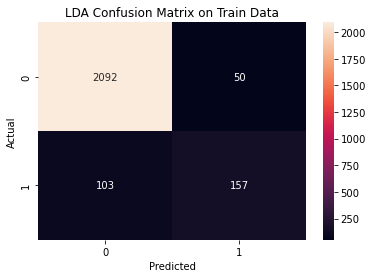

In [70]:
ax=sns.heatmap(metrics.confusion_matrix(y_train, pred_train),annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LDA Confusion Matrix on Train Data')
plt.show()

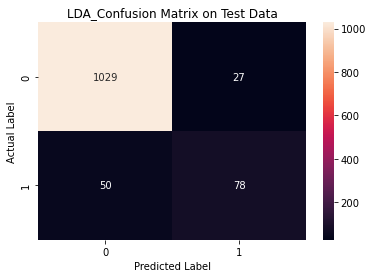

In [79]:
ax=sns.heatmap(metrics.confusion_matrix(y_test, pred_test),annot=True, fmt='d',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('LDA_Confusion Matrix on Test Data')
plt.show()

In [71]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2142
           1       0.76      0.60      0.67       260

    accuracy                           0.94      2402
   macro avg       0.86      0.79      0.82      2402
weighted avg       0.93      0.94      0.93      2402



Area under Curve is 0.946468074409251


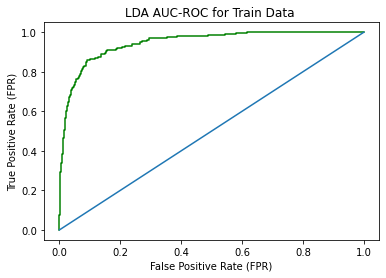

In [78]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_train,selector_LDA.predict_proba(X_train)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='-')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (FPR)")
plt.title("LDA AUC-ROC for Train Data ")
rf_test_auc=roc_auc_score(y_train,selector_LDA.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_test_auc)

In [76]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1056
           1       0.74      0.61      0.67       128

    accuracy                           0.93      1184
   macro avg       0.85      0.79      0.82      1184
weighted avg       0.93      0.93      0.93      1184



Area under Curve is 0.9504616477272727


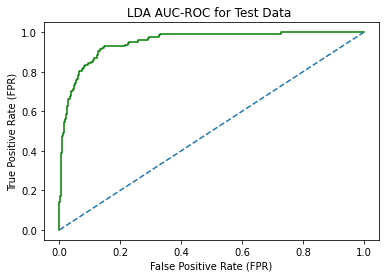

In [77]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,selector_LDA.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (FPR)")
plt.title("LDA AUC-ROC for Test Data ")
rf_test_auc=roc_auc_score(y_test,selector_LDA.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)